In [1]:
import numpy as np
import pandas as pd
import os
from gensim.parsing.preprocessing import remove_stopwords
from gensim import models
from pathlib import Path
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# loading datasets and preliminary cleaning


2022-06-11 15:36:44.495746: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:


# loading datasets and preliminary cleaning

subtitles=pd.read_csv('../data/movies_subtitles.csv')
metas=pd.read_csv('../data/movies_meta.csv')


print(len(subtitles))
print(len(metas))
indexes=list(metas['imdb_id'])
print(len(indexes))
print(indexes[0])


subtitles2=subtitles.loc[subtitles['imdb_id'].isin(indexes)]
print(len(subtitles2))



5589021
4690
4690
tt0114709
5589021


In [3]:

# load NLU model

model = GPT2LMHeadModel.from_pretrained('gpt2')  # or any other checkpoint
word_embeddings = model.transformer.wte.weight  # Word Token Embeddings 
position_embeddings = model.transformer.wpe.weight 
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


In [4]:

# clean subtitle's text

def clean_text(x):
    '''
    method to normalize the movie titles
    '''
    x=x.lower()  
    for char in ["\n", "'"]:
        x=x.replace(char, " ")  
    for char in ["-", ",", ".", ":", ";", "(", ")", "/", "!", "?", "%", "<i>", "<u>", "<b>", "♪", " s ", " m ", " t ", " ve ", "#"]:
        x=x.replace(char, "") 

    x=remove_stopwords(x)
    return x
 
subtitles=subtitles.dropna()
subtitles['text']=subtitles['text'].apply(clean_text)

movies_list=[]

for index in subtitles['imdb_id'].unique()[:10]:
    globals()['%s' % index]= subtitles.loc[subtitles['imdb_id']==index]
    movies_list.append(globals()['%s' % index])
    print(index)
  
    
print(tt0114709)



tt0114709
tt0113497
tt0113189
tt0113627
tt0112637
tt0112818
tt0113442
tt0112697
tt0113855
tt0114148
        Unnamed: 0  start_time  end_time                                 text  \
0                0      58.559    61.602                    boy right stickup   
1                1      61.687    63.354                           donanybody   
2                2      64.398    66.482                                 safe   
3                3      68.318    71.612  oohhoohoo money money money kissing   
4                4      71.697    74.031            stop stop mean old potato   
...            ...         ...       ...                                  ...   
540642      680741    4722.509  4725.595                       friendship die   
540643      680742    4727.139  4731.935                  gonna itour destiny   
540644      680743    4732.019  4735.980                        yougot friend   
540645      680744    4736.065  4738.650                        yougot friend   
540646   

tt0114709
tt0113497
tt0113189
tt0113627
tt0112637
tt0112818
tt0113442
tt0112697
tt0113855
tt0114148
768
768


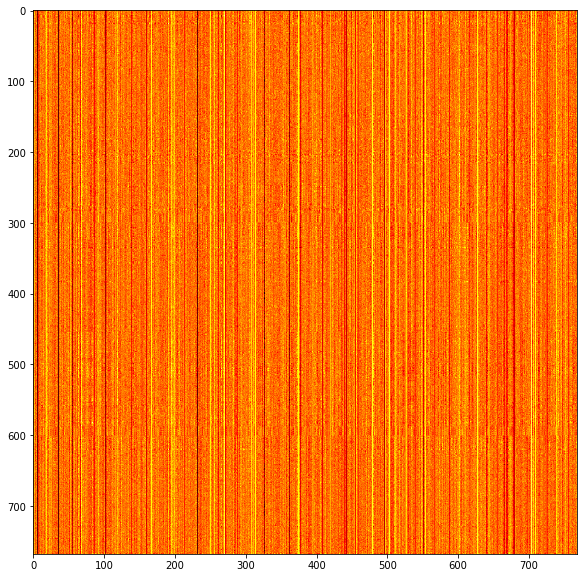

In [5]:


for movie in movies_list:
        
    dimension=int(len(movie)/768)
    low_bound=0
    high_bound=dimension   
    
    movie_words=[]
    for i in range(768):
        text=[]
        subset=movie.iloc[low_bound:high_bound]
       
        text+=subset['text'].to_string().split()
      
        globals()['sentences_%s' % i]=text
        low_bound+=dimension
        high_bound+=dimension
        movie_words.append(globals()['sentences_%s' % i])
        
    #print(len(movie_words))
   # print(movie_words[:5])
        
    matrix=[]
    
    for sentence in movie_words:
        sent_vect=[]
        for word in sentence:
            text_index = tokenizer.encode(word,add_prefix_space=True)
            vector = model.transformer.wte.weight[text_index,:]
            vector=vector.detach().numpy()         
            sent_vect.append(vector[0])
        matrix.append(np.sum(sent_vect, axis=0) / len(sent_vect))  
        
    name=list(movie['imdb_id'])[0]
    print(name)
    globals()['matrix_%s' % name]= matrix

    
print(len(matrix_tt0113189))
print(len(matrix_tt0113189[0]))



plt.figure(figsize=(10, 10))
plt.imshow(matrix_tt0113189, cmap='hot', interpolation='nearest')
plt.show()